<a href="https://colab.research.google.com/github/drmistretta/ACRD/blob/main/Hubble_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📁 Upload three grayscale images (e.g., red, green, blue filters).


Saving red_filter_img.jpeg to red_filter_img (9).jpeg
Saving green_filter_img.jpeg to green_filter_img (9).jpeg
Saving blue_filter_img.jpeg to blue_filter_img (9).jpeg
✅ Uploaded files: dict_keys(['red_filter_img (9).jpeg', 'green_filter_img (9).jpeg', 'blue_filter_img (9).jpeg'])


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128301 (\N{TELESCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


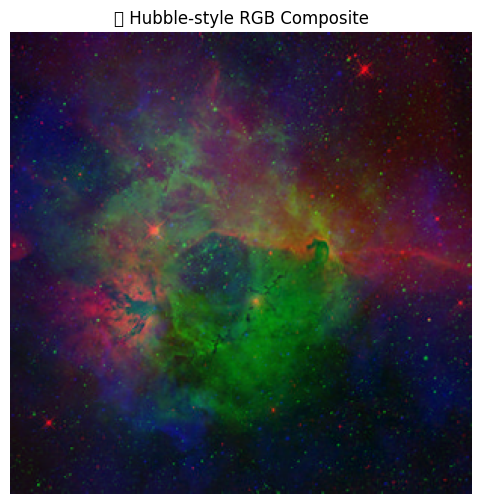

In [11]:
# Install required packages
!pip install pillow numpy matplotlib

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

# Upload prompt
print("📁 Upload three grayscale images (e.g., red, green, blue filters).")
uploaded = files.upload()

# Confirm uploaded file names
print("✅ Uploaded files:", uploaded.keys())

# Match filenames by keyword
try:
    red_file = next(f for f in uploaded if "red" in f.lower())
    green_file = next(f for f in uploaded if "green" in f.lower())
    blue_file = next(f for f in uploaded if "blue" in f.lower())
except StopIteration as e:
    raise ValueError("❌ One or more images missing. Make sure filenames include 'red', 'green', and 'blue'.")

# Load images and convert to grayscale
red_img = Image.open(BytesIO(uploaded[red_file])).convert("L")
green_img = Image.open(BytesIO(uploaded[green_file])).convert("L")
blue_img = Image.open(BytesIO(uploaded[blue_file])).convert("L")

# Resize all to match red image size
target_size = red_img.size  # (width, height)
green_img = green_img.resize(target_size)
blue_img = blue_img.resize(target_size)

# Normalize to 0–1 scale
red_norm = np.array(red_img) / 255.0
green_norm = np.array(green_img) / 255.0
blue_norm = np.array(blue_img) / 255.0

# Adjust filter strength
red_strength = 1.0
green_strength = 0.8
blue_strength = 0.6

# Apply strength and convert to 8-bit
red_final = (red_norm * red_strength * 255).clip(0, 255).astype(np.uint8)
green_final = (green_norm * green_strength * 255).clip(0, 255).astype(np.uint8)
blue_final = (blue_norm * blue_strength * 255).clip(0, 255).astype(np.uint8)

# Combine channels
rgb = np.stack([red_final, green_final, blue_final], axis=-1)

# Show the final image
plt.figure(figsize=(6, 6))
plt.imshow(rgb)
plt.title("🔭 Hubble-style RGB Composite")
plt.axis("off")
plt.show()
